In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import utils as u
import peakutils as pu
from scipy.signal import savgol_filter

In [2]:
filename='/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/WithTrace/228Th-grafico-tesi-im260421_1__0.npy'

coll=ca.NPYreader(filename,True).get_event()
for i in range(5,30,5):
        filename='/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/AnalisiBig3/228Th-grafico-tesi-im260421_1__'+str(i)+'.npy'
        temp=ca.NPYreader(filename,False).get_event()

        if(i==5):
            coll_tot=temp
        else:
            coll_tot=coll_tot+temp
            del(temp)
        #print('opened '+str(i))

print('coll events: '+str(coll.n_trace))
print('coll_tot events: '+str(coll_tot.n_trace))

/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/WithTrace/228Th-grafico-tesi-im260421_1
coll events: 136889
coll_tot events: 3559114


In [4]:
curr1=coll.get_curr()
trace1=coll.get_traces()

<IPython.core.display.Javascript object>


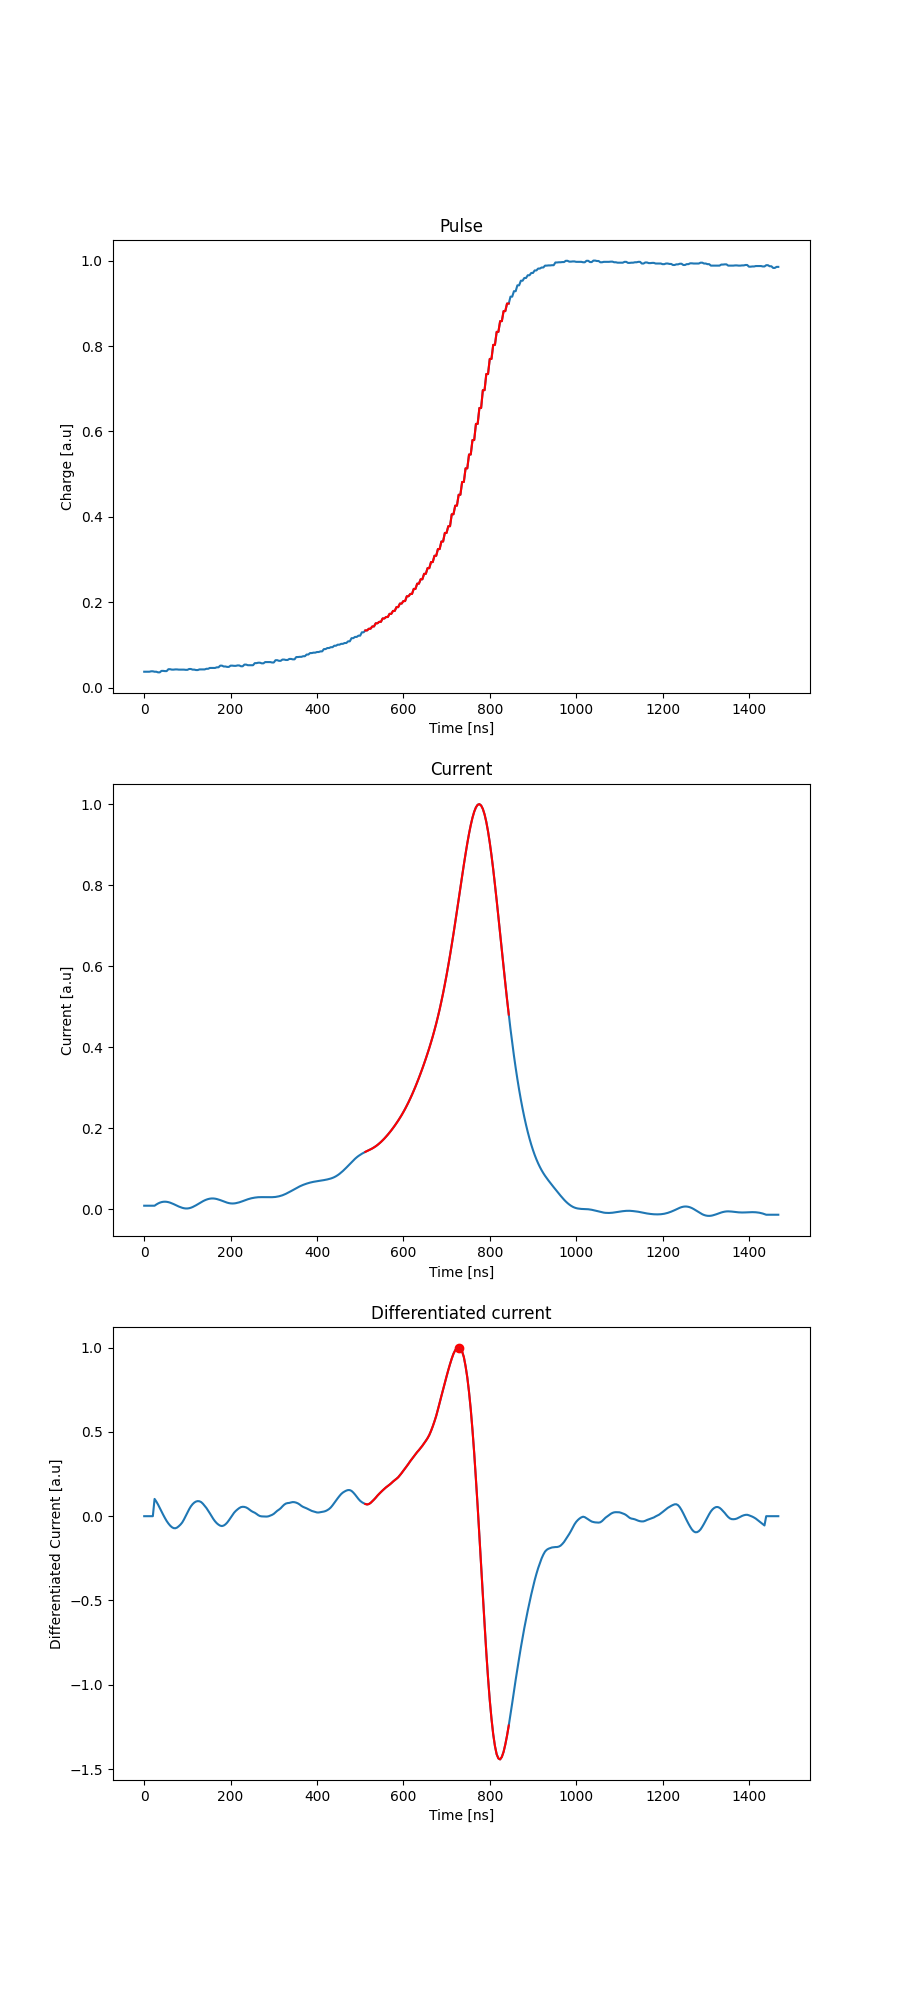

In [14]:
nd_der_obj=u.second_derivative()
rtobj=u.rise_time()
peaks_obj=u.n_peaks()


i=2
c,f=nd_der_obj.compute_der(curr1[i])
time=np.arange(0,len(c),1)*4
fig,axs=plt.subplots(3,figsize=(9,20))
axs[0].plot(time,trace1[i]/max(trace1[i]))
axs[0].set_title('Pulse')
axs[1].plot(time,c/max(c))
axs[1].set_title('Current')
axs[2].plot(time,f/max(f))
axs[2].set_title('Differentiated current')

axs[0].set(xlabel='Time [ns]',ylabel='Charge [a.u]')
axs[1].set(xlabel='Time [ns]',ylabel='Current [a.u]')
axs[2].set(xlabel='Time [ns]',ylabel='Differentiated Current [a.u]')

rt,t=rtobj.compute_rt(trace1[i],4e-9)

x=np.arange(0,len(trace1[i]),1)
axs[0].plot(x[t[0] : t[1]]*4,trace1[i][t[0] : t[1]]/max(trace1[i]),color='r')
axs[1].plot(x[t[0] : t[1]]*4,c[t[0] : t[1]]/max(c),color='r')
axs[2].plot(x[t[0] : t[1]]*4,f[t[0] : t[1]]/max(f),color='r')

indexes=nd_der_obj.compute_n_peaks(f,t)[0]
axs[2].scatter(indexes*4,f[indexes]/max(f),marker='o',color='r')

plt.show()

In [17]:
#Cut ae to see if between SSE and MSE persists a difference in risetime

coll_SSE=((coll_tot.subset('energy',0,1618)+coll_tot.subset('energy',1626,2098)+coll_tot.subset('energy',2110,2608)+coll_tot.subset('energy',2618)).subset('ae',1.90e-2,1.95e-2)).subset('energy',1550)
coll_MSE=((coll_tot.subset('energy',0,1590)+coll_tot.subset('energy',1597)).subset('ae',0,1.6e-2)).subset('energy',1550)

n1=coll_MSE.get_n_peaks_2der()
n2=coll_SSE.get_n_peaks_2der()

coll_SSE2=((coll_tot.subset('energy',0,1618)+coll_tot.subset('energy',1626,2098)+coll_tot.subset('energy',2110,2608)+coll_tot.subset('energy',2618)).subset('ae',1.90e-2,1.95e-2))
coll_MSE2=((coll_tot.subset('energy',0,1590)+coll_tot.subset('energy',1597)).subset('ae',0,1.6e-2))

n3=coll_MSE2.get_n_peaks_2der()
n4=coll_SSE2.get_n_peaks_2der()

<IPython.core.display.Javascript object>


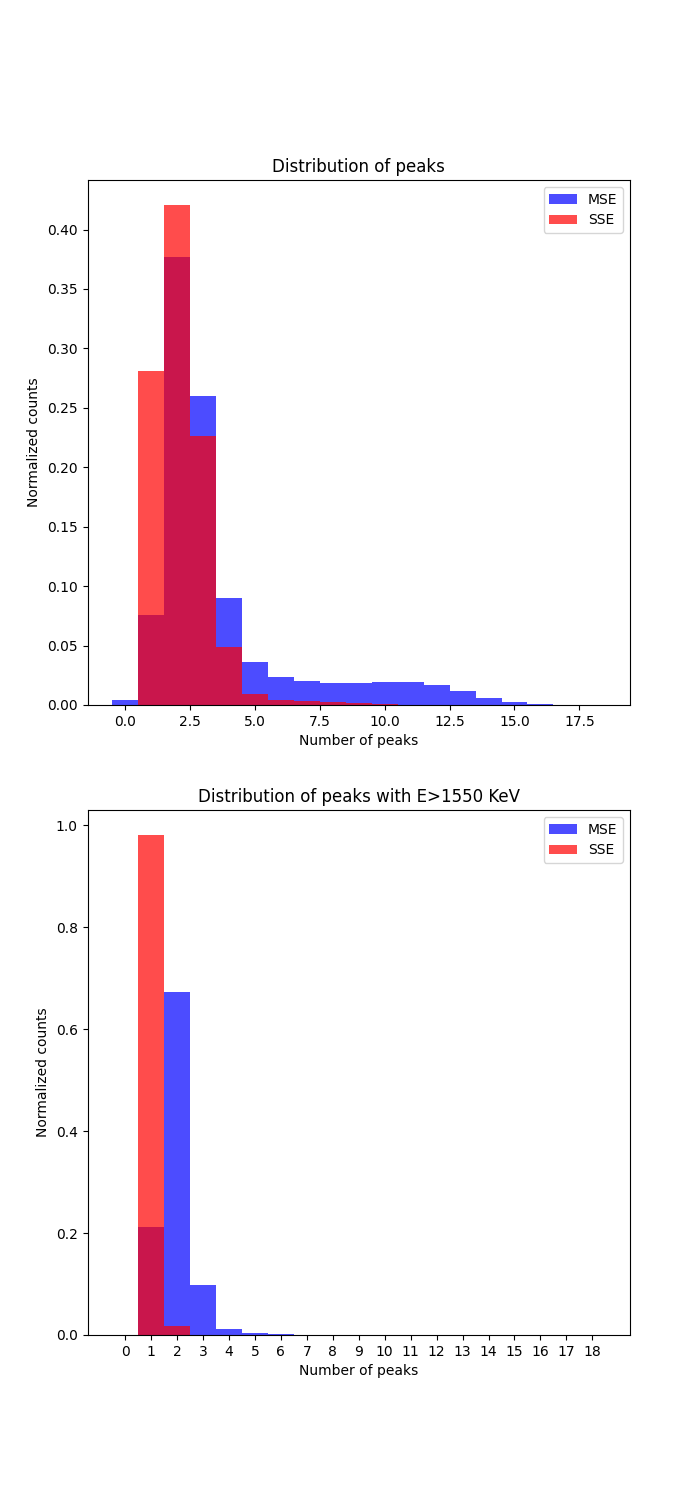

([<matplotlib.axis.XTick at 0x7f3adf6599d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [25]:
#Distribution of the events
bins=range(20)

fig,axs=plt.subplots(2,figsize=(7,15))
axs[0].hist(n3,color='b',alpha=0.7,bins=bins,density=True,label='MSE',align='left')
axs[0].hist(n4,color='r',alpha=0.7,bins=bins,density=True,label='SSE',align='left')
axs[0].set_title('Distribution of peaks')

axs[1].hist(n1,color='b',alpha=0.7,bins=bins,density=True,label='MSE',align='left')
axs[1].hist(n2,color='r',alpha=0.7,bins=bins,density=True,label='SSE',align='left')
axs[1].set_title('Distribution of peaks with E>1550 KeV')

axs[0].set(xlabel='Number of peaks')
axs[1].set(xlabel='Number of peaks')
axs[0].set(ylabel='Normalized counts')
axs[1].set(ylabel='Normalized counts')
axs[0].legend()
axs[1].legend()

plt.xticks(range(19))

<IPython.core.display.Javascript object>


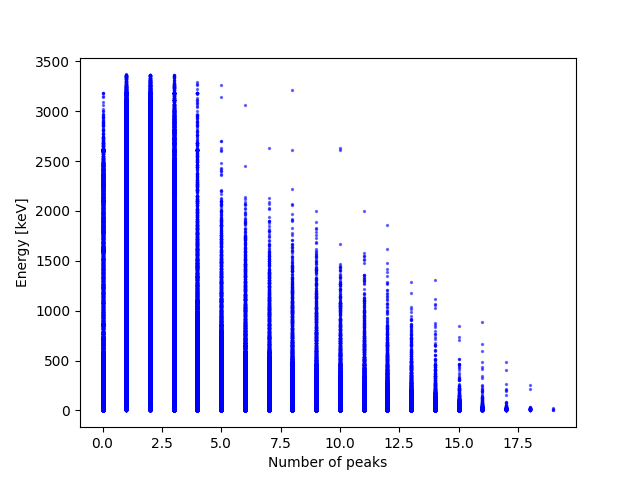

Text(0, 0.5, 'Energy [keV]')

In [21]:
#Scatter plot
plt.figure()
plt.scatter(coll_tot.get_n_peaks_2der(),coll_tot.get_energies(),s=2,alpha=0.5,color='b')
plt.show()

plt.xlabel('Number of peaks')
plt.ylabel('Energy [keV]')